<a href="https://colab.research.google.com/github/ytg000629/ai4dl/blob/main/week2/chapter02_mathematical-building-blocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# The mathematical building blocks of neural networks

## A first look at a neural network

**Loading the MNIST dataset in Keras**

In [1]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [2]:
train_images.shape

(60000, 28, 28)

In [3]:
train_images[0].shape

(28, 28)

In [4]:
len(train_labels)

60000

In [5]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
import pandas as pd
df = pd.DataFrame(train_labels)
df.value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

In [9]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

**The network architecture**

In [10]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"), #크기가 512인 layer
    layers.Dense(10, activation="softmax") #크기가 10인 layer
])

**The compilation step**

In [11]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

**Preparing the image data**

In [12]:
train_images.shape

(60000, 28, 28)

In [13]:
train_images = train_images.reshape((60000, 28 * 28)) #(60000, 784)으로 바꿈
train_images

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [14]:
train_images[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [15]:
len(train_images[0])

784

In [16]:
len(train_images)

60000

In [17]:
train_images = train_images.astype("float32") / 255
train_images[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [18]:
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

**"Fitting" the model**

In [19]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 6s 12ms/step - loss: 0.2659 - accuracy: 0.9224
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.1083 - accuracy: 0.9679
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0700 - accuracy: 0.9789
Epoch 4/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0507 - accuracy: 0.9848
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0379 - accuracy: 0.9886


**Using the model to make predictions**

In [20]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 [==============================] - 0s 133ms/step


array([2.9750558e-07, 8.2912899e-10, 1.8371583e-06, 5.9312738e-06,
       1.5295385e-11, 9.8863936e-08, 3.2791760e-12, 9.9999148e-01,
       2.1369409e-08, 1.8121989e-07], dtype=float32)

In [21]:
predictions.shape
#layers.Dense(10, activation="softmax") 크기가 10인 layer 생성했기 때문문

(10, 10)

In [22]:
predictions[0].argmax() #가장 높은 화률값을 가진 인덱스

7

In [23]:
predictions[0][7]

0.9999915

In [24]:
test_labels[0]

7

**Evaluating the model on new data**

In [25]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0751 - accuracy: 0.9769
test_acc: 0.9768999814987183


## Data representations for neural networks

### Scalars (rank-0 tensors)

In [26]:
import numpy as np
x = np.array(12)
x

array(12)

In [27]:
x.ndim

0

### Vectors (rank-1 tensors)

In [28]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [29]:
x.ndim

1

### Matrices (rank-2 tensors)

In [30]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

### Rank-3 and higher-rank tensors

In [31]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

### Key attributes

In [32]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [33]:
train_images.ndim

3

In [34]:
train_images.shape

(60000, 28, 28)

In [35]:
train_images.dtype
#unit은 양수만 가능한 데이터 타입. uint8 : 0~255

dtype('uint8')

In [36]:
type(train_images)

numpy.ndarray

**Displaying the fourth digit**

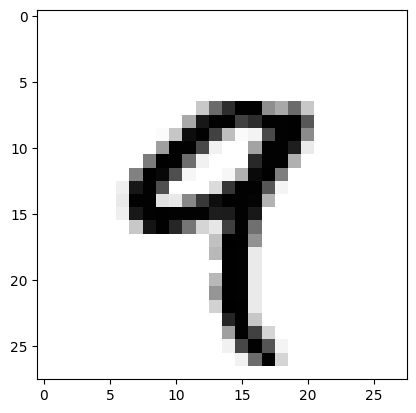

In [37]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [38]:
train_labels[4]

9

### Manipulating tensors in NumPy

In [39]:
train_images.shape

(60000, 28, 28)

In [40]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [41]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [42]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape
#셋 다 같은 말말

(90, 28, 28)

In [43]:
my_slice = train_images[:, 14:, 14:]

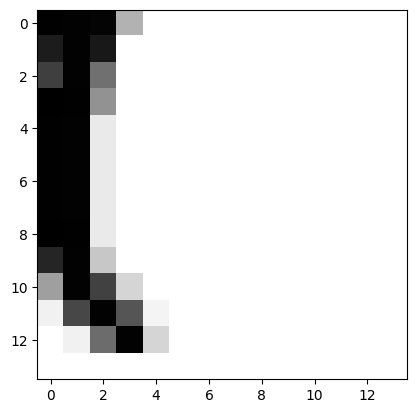

In [44]:
import matplotlib.pyplot as plt
digit = my_slice[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [45]:
my_slice = train_images[:, 7:-7, 7:-7]

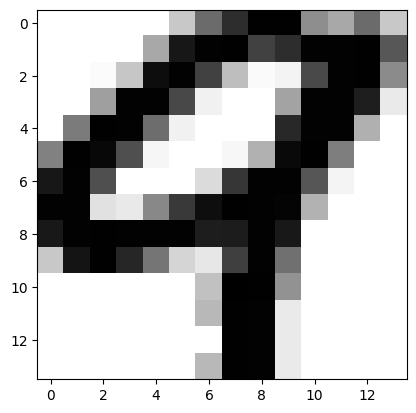

In [46]:
import matplotlib.pyplot as plt
digit = my_slice[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

### The notion of data batches

In [47]:
batch = train_images[:128]

In [48]:
batch = train_images[128:256]

In [49]:
n = 3
batch = train_images[128 * n:128 * (n + 1)]

### Real-world examples of data tensors

### Vector data

### Timeseries data or sequence data

### Image data

### Video data

## The gears of neural networks: tensor operations

### Element-wise operations

In [51]:
def naive_relu(x):
    assert len(x.shape) == 2 #가정 설정문
    x = x.copy() #copy 해줘야함
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [52]:
x= np.array([[1,2,3,4],[1,-1,-3,0]])
#len(x.shape) == 2 이어야함

In [53]:
naive_relu(x)

array([[1, 2, 3, 4],
       [1, 0, 0, 0]])

In [55]:
x

array([[ 1,  2,  3,  4],
       [ 1, -1, -3,  0]])

In [54]:
def naive_relu(x):
    assert len(x.shape) == 2 #가정 설정문
    #copy 안함
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [56]:
x= np.array([[1,2,3,4],[1,-1,-3,0]])
naive_relu(x)

array([[1, 2, 3, 4],
       [1, 0, 0, 0]])

In [57]:
x
#copy 안쓰면 원본 x가 바뀜

array([[1, 2, 3, 4],
       [1, 0, 0, 0]])

In [58]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [59]:
x= np.array([[1,2,3,4],[1,-1,-3,0]])
y= np.array([[1,2,3,4],[1,-1,-3,0]])

In [60]:
naive_add(x,y)

array([[ 2,  4,  6,  8],
       [ 2, -2, -6,  0]])

In [63]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 0.01 s


In [62]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 2.16 s


for loop가 2개 있어서 vectorise 버전보다 naive operation이 시간이 더 오래 걸림

### Broadcasting

In [8]:
import numpy as np
X = np.random.random((32, 10)) 
y = np.random.random((10,))

In [9]:
X.shape

(32, 10)

In [10]:
y.shape

(10,)

In [11]:
y

array([0.85492769, 0.46549033, 0.31537012, 0.31134405, 0.14113015,
       0.77294634, 0.36563762, 0.39076859, 0.97552177, 0.1125757 ])

In [12]:
(X+y).shape

(32, 10)

In [13]:
y = np.expand_dims(y, axis=0)
#y의 1번째 축제 차원을 추가. (10,0) -> (1,10)

In [14]:
y.shape

(1, 10)

In [15]:
y

array([[0.85492769, 0.46549033, 0.31537012, 0.31134405, 0.14113015,
        0.77294634, 0.36563762, 0.39076859, 0.97552177, 0.1125757 ]])

In [16]:
[y]

[array([[0.85492769, 0.46549033, 0.31537012, 0.31134405, 0.14113015,
         0.77294634, 0.36563762, 0.39076859, 0.97552177, 0.1125757 ]])]

In [17]:
Y = np.concatenate([y] * 32, axis=0)
#axis = 0 행방향으로 배열 합치기

In [18]:
Y.shape

(32, 10)

In [19]:
Y
#first 벡터가 32번 copy

array([[0.85492769, 0.46549033, 0.31537012, 0.31134405, 0.14113015,
        0.77294634, 0.36563762, 0.39076859, 0.97552177, 0.1125757 ],
       [0.85492769, 0.46549033, 0.31537012, 0.31134405, 0.14113015,
        0.77294634, 0.36563762, 0.39076859, 0.97552177, 0.1125757 ],
       [0.85492769, 0.46549033, 0.31537012, 0.31134405, 0.14113015,
        0.77294634, 0.36563762, 0.39076859, 0.97552177, 0.1125757 ],
       [0.85492769, 0.46549033, 0.31537012, 0.31134405, 0.14113015,
        0.77294634, 0.36563762, 0.39076859, 0.97552177, 0.1125757 ],
       [0.85492769, 0.46549033, 0.31537012, 0.31134405, 0.14113015,
        0.77294634, 0.36563762, 0.39076859, 0.97552177, 0.1125757 ],
       [0.85492769, 0.46549033, 0.31537012, 0.31134405, 0.14113015,
        0.77294634, 0.36563762, 0.39076859, 0.97552177, 0.1125757 ],
       [0.85492769, 0.46549033, 0.31537012, 0.31134405, 0.14113015,
        0.77294634, 0.36563762, 0.39076859, 0.97552177, 0.1125757 ],
       [0.85492769, 0.46549033, 0.3153701

In [20]:
X + Y
# 브로드캐스팅에 의해 X + y 랑 같음

array([[1.52728673, 0.56112405, 0.42630895, 0.76004548, 0.71143509,
        0.92484693, 0.9619649 , 0.63053982, 1.53533813, 0.78082864],
       [1.67034118, 0.51595763, 0.62834991, 1.30611256, 0.74030926,
        1.37061931, 0.83710862, 0.39828005, 1.9502984 , 0.48998301],
       [1.14328838, 0.7527083 , 1.01545563, 1.01686698, 0.99844399,
        1.09880462, 1.24226585, 1.0390056 , 1.78832306, 0.65720634],
       [1.47501133, 0.69455214, 0.53793472, 0.65125376, 0.2502612 ,
        1.24871813, 1.20060898, 0.68563463, 1.6746628 , 0.55626649],
       [1.48828078, 0.57809456, 0.88487528, 0.49602249, 1.08331363,
        1.71859888, 1.28748487, 0.590939  , 1.44633376, 0.50964242],
       [1.82280995, 1.3467752 , 1.24617182, 0.88397952, 1.02048759,
        0.95958107, 0.82799976, 1.18951778, 1.02608198, 0.72256004],
       [1.26911224, 1.22289786, 0.77020277, 0.61784641, 0.56273182,
        1.41799743, 1.09630833, 0.66190074, 1.06084437, 0.95177245],
       [1.27926434, 1.17760478, 0.8511361

In [23]:
import numpy as np
X = np.random.random((32, 10)) 
y = np.random.random((10,))

In [24]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [26]:
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)

In [27]:
z.shape
#브로드캐스팅을 통해 (32,10)을 반복해서 shape(64,3,32,10)이 되게 함

(64, 3, 32, 10)

### Tensor product

In [ ]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)

In [ ]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [ ]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [ ]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

In [ ]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

### Tensor reshaping

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))

In [ ]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x.shape

In [ ]:
x = x.reshape((6, 1))
x

In [ ]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

### Geometric interpretation of tensor operations

### A geometric interpretation of deep learning

## The engine of neural networks: gradient-based optimization

### What's a derivative?

### Derivative of a tensor operation: the gradient

### Stochastic gradient descent

### Chaining derivatives: The Backpropagation algorithm

#### The chain rule

#### Automatic differentiation with computation graphs

#### The gradient tape in TensorFlow

In [ ]:
import tensorflow as tf
x = tf.Variable(0.)
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [ ]:
x = tf.Variable(tf.random.uniform((2, 2)))
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [ ]:
W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2, 2))
with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])

## Looking back at our first example

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

### Reimplementing our first example from scratch in TensorFlow

#### A simple Dense class

In [ ]:
import tensorflow as tf

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation

        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)

        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.W) + self.b)

    @property
    def weights(self):
        return [self.W, self.b]

#### A simple Sequential class

In [ ]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
           x = layer(x)
        return x

    @property
    def weights(self):
       weights = []
       for layer in self.layers:
           weights += layer.weights
       return weights

In [ ]:
model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4

#### A batch generator

In [ ]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

### Running one training step

In [ ]:
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss

In [ ]:
learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)

In [ ]:
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

### The full training loop

In [ ]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"Epoch {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"loss at batch {batch_counter}: {loss:.2f}")

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

### Evaluating the model

In [ ]:
predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"accuracy: {matches.mean():.2f}")

## Summary